# Model Evaluation

## Review of last class

- Goal was to predict the **response value** of an **unknown observation**
    - predict the species of an unknown iris
    - predict the position of an unknown NBA player
- Made predictions using KNN models with **different values of K**
- Need a way to choose the **"best" model**: the one that "generalizes" to "out-of-sample" data

**Solution:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

**Note:** These procedures can be used with **any machine learning model**, not only KNN.

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [1]:
# read the NBA data into a DataFrame
import pandas as pd
from IPython.display import Image

url = 'https://raw.githubusercontent.com/JamesByers/GA-SEA-DAT2/master/data/NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [2]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [3]:
# create feature matrix (X)
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [4]:
# create response vector (y)
y = nba.pos_num

### KNN (K=50)

In [5]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=50)

# train the model on the entire dataset
knn.fit(X, y)

# predict the response values for the observations in X ("test the model")
knn.predict(X)

array([1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1,

In [6]:
nba.shape

(478, 50)

In [7]:
# store the predicted response values
y_pred_class = knn.predict(X)

To evaluate a model, we also need an **evaluation metric:**

- Numeric calculation used to **quantify** the performance of a model
- Appropriate metric depends on the **goals** of your problem

Most common choices for classification problems:

- **Classification accuracy**: percentage of correct predictions ("reward function" since higher is better)
- **Classification error**: percentage of incorrect predictions ("loss function" since lower is better)

In this case, we'll use classification accuracy.

In [8]:
# compute classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred_class))


0.665271966527


This is known as **training accuracy** because we are evaluating the model on the same data we used to train the model.

### KNN (K=1)

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred_class = knn.predict(X)
print(metrics.accuracy_score(y, y_pred_class))

1.0


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data:
    - Will do well when tested using the in-sample data
    - May do poorly on out-of-sample data
    - Learns the "noise" in the data rather than the "signal"
    - From Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)

**Thus, training accuracy is not a good estimate of out-of-sample accuracy.**

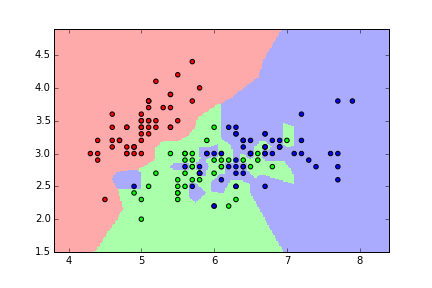

In [10]:
Image("../../assets/images/iris_01nn_map.png")

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

What does this accomplish?

- Model can be trained and tested on **different data** (we treat testing data like out-of-sample data).
- Response values are known for the testing set, and thus **predictions can be evaluated**.

This is known as **testing accuracy** because we are evaluating the model on an independent "test set" that was not used during model training.

**Testing accuracy is a better estimate of out-of-sample performance than training accuracy.**

### Understanding "unpacking"

In [61]:
def min_max(nums):
    smallest = min(nums)
    largest = max(nums)
    return [smallest, largest, 5]

In [62]:
min_and_max = min_max([1, 2, 3])
print(min_and_max)
print(type(min_and_max))

[1, 3, 5]
<class 'list'>


In [63]:
five, the_min, the_max = min_max([1, 2, 3])
print(the_min)
print(five)

3
1


### Understanding the `train_test_split` function

In [64]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [65]:
# before splitting
print(X.shape)

# after splitting
print(X_train.shape)
print(X_test.shape)

(478, 5)
(358, 5)
(120, 5)


In [66]:
# before splitting
print(y.shape)

# after splitting
print(y_train.shape)
print(y_test.shape)

(478,)
(358,)
(120,)


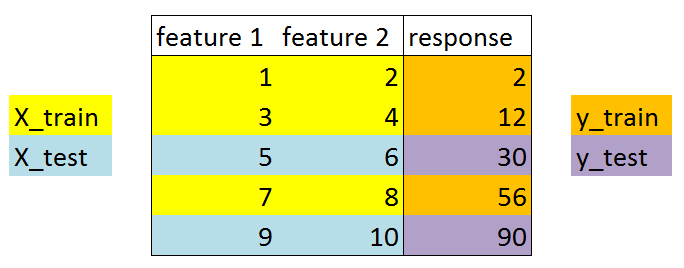

In [11]:
Image("../../assets/images/train_test_split.png")

In [12]:
# create a function with the same functionality as train test split
# 1. name the function tt_split
# 2. the function should split both X and y into a train and test set and return both
# 3. BONUS: allow the user to say what % of data should lie in the training set

def tt_split(X,y, split=.5):
    train_end_ind = int(len(X)*split)
    X_train = X[0:train_end_ind]
    X_test = X[train_end_ind:]
    y_train = X[0:train_end_ind]
    y_test = X[train_end_ind:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = tt_split(X, y, split=.05)

### Understanding the `random_state` parameter

In [67]:
# WITHOUT a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y)

# print the first element of each object
print(X_train.head(1))


     ast  stl  blk  tov   pf
433  1.0  0.0  0.0  0.0  0.0


In [13]:
# WITH a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# print the first element of each object
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

NameError: name 'train_test_split' is not defined

### Using the train/test split procedure (K=1)

In [69]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [71]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.616666666667


### Repeating for K=50

In [72]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.675


![Bias-variance tradeoff](../images/bias_variance.png)

### Comparing testing accuracy with null accuracy

Null accuracy is the accuracy that could be achieved by **always predicting the most frequent class**. It is a benchmark against which you may want to measure your classification model.

In [73]:
# examine the class distribution
y_test.value_counts()

2    60
1    49
0    11
Name: pos_num, dtype: int64

In [74]:
# compute null accuracy
y_test.value_counts().head(1) / len(y_test)

2    0.5
Name: pos_num, dtype: float64

### Searching for the "best" value of K

In [75]:
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 100

k_range = range(1, 101)
training_error = []
testing_error = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # calculate training error
    knn.fit(X, y)
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [76]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [77]:
# create a DataFrame of K, training error, and testing error
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,testing error,training error
K,,
100,0.366667,0.351464
99,0.358333,0.347280
98,0.366667,0.345188
97,0.366667,0.347280
96,0.366667,0.345188


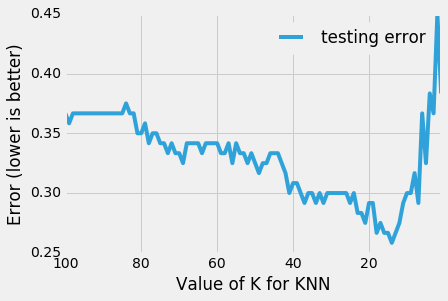

In [78]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
df.plot(y='testing error')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

In [14]:
# plot the relationship between K (HIGH TO LOW) and TRAINING ERROR
df.plot(y='training error')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

NameError: name 'df' is not defined

In [79]:
# find the minimum testing error and the associated K value
df.sort('testing error').head()

C:\Users\alsherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,testing error,training error
K,,
14,0.258333,0.286611
13,0.266667,0.282427
18,0.266667,0.284519
16,0.266667,0.282427
15,0.266667,0.284519


In [80]:
# alternative method
min(zip(testing_error, k_range))

(0.2583333333333333, 14)

What could we conclude?

- When using KNN on this dataset with these features, the **best value for K** is likely to be around 23.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 70% of the time.

### Training error versus testing error

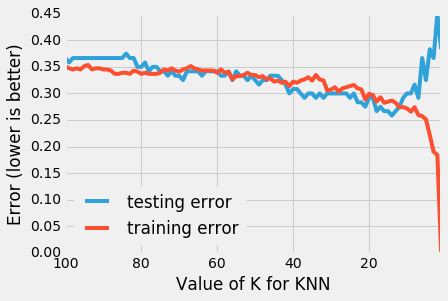

In [81]:
# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

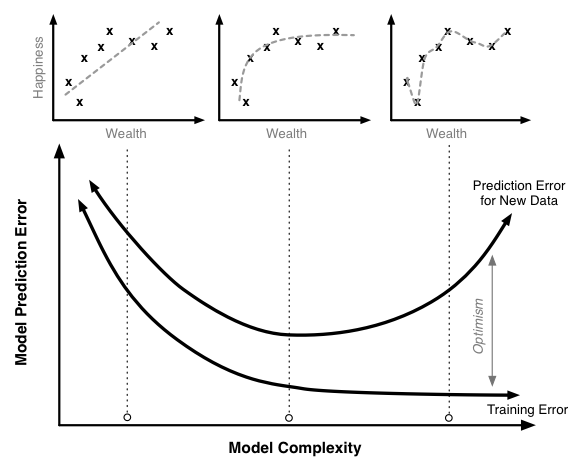

In [19]:
Image("../../assets/images/training_testing_error.png")

## Making predictions on out-of-sample data

Given the statistics of a (truly) unknown player, how do we predict his position?

In [82]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=23)

# re-train the model with X and y (not X_train and y_train) - why?
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[1, 1, 0, 1, 2]])

C:\Users\alsherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1], dtype=int64)

## Disadvantages of train/test split?

What would happen if the `train_test_split` function had split the data differently? Would we get the same exact results as before?

In [83]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=98)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.641666666667


- Testing accuracy is a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation and provides more reliable estimates
- But, train/test split is still useful because of its **flexibility and speed**

**Question:** What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer:** That's the essense of cross-validation!

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

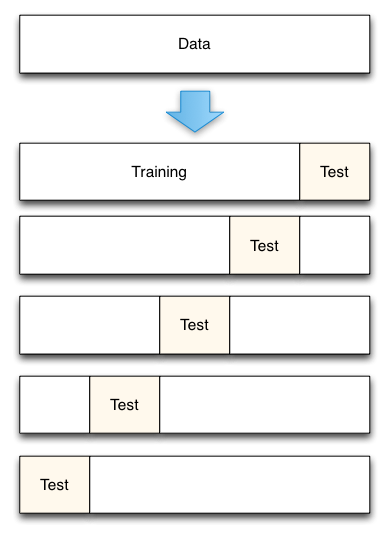

In [23]:
# Diagram of **5-fold cross-validation:**

Image("../../assets/images/cross_validation_diagram.png")

In [24]:
# simulate splitting a dataset of 25 observations into 5 folds
import numpy as np
X_ = np.array([num for num in range(0,25)])

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)

# print the contents of each training and testing set
for train_index, test_index in kf.split(X_):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    print()

TRAIN: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
TEST: [0 1 2 3 4]

TRAIN: [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
TEST: [5 6 7 8 9]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]
TEST: [10 11 12 13 14]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]
TEST: [15 16 17 18 19]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
TEST: [20 21 22 23 24]



- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

## Comparing cross-validation to train/test split

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print('The cross_val scores are: {}'.format(scores), '\n')
print('The mean of the cross_val scores is: {}'.format(scores.mean()))

The cross_val scores are: [ 0.52083333  0.625       0.64583333  0.5         0.625       0.70833333
  0.64583333  0.60416667  0.54166667  0.63043478] 

The mean of the cross_val scores is: 0.6047101449275363


**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

## Resources

- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)